## EDA Considering behavior of target and features over time

In [1]:
# importing libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# loading dataset
df = pd.read_csv('../data/GEFCom2014Data/Wind/clean_data.csv', 
                    parse_dates= ['TIMESTAMP'],
                    index_col= 'TIMESTAMP' )

Target over hours over all windfarms in average.

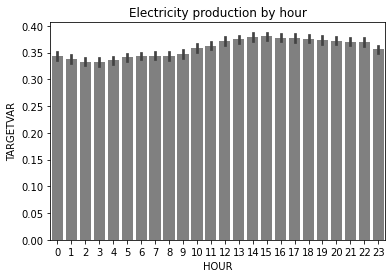

In [5]:
sns.barplot(data = df, x = 'HOUR', y = 'TARGETVAR', color='gray')
plt.title('Electricity production by hour')
plt.show()

Target over hour for every windfarm

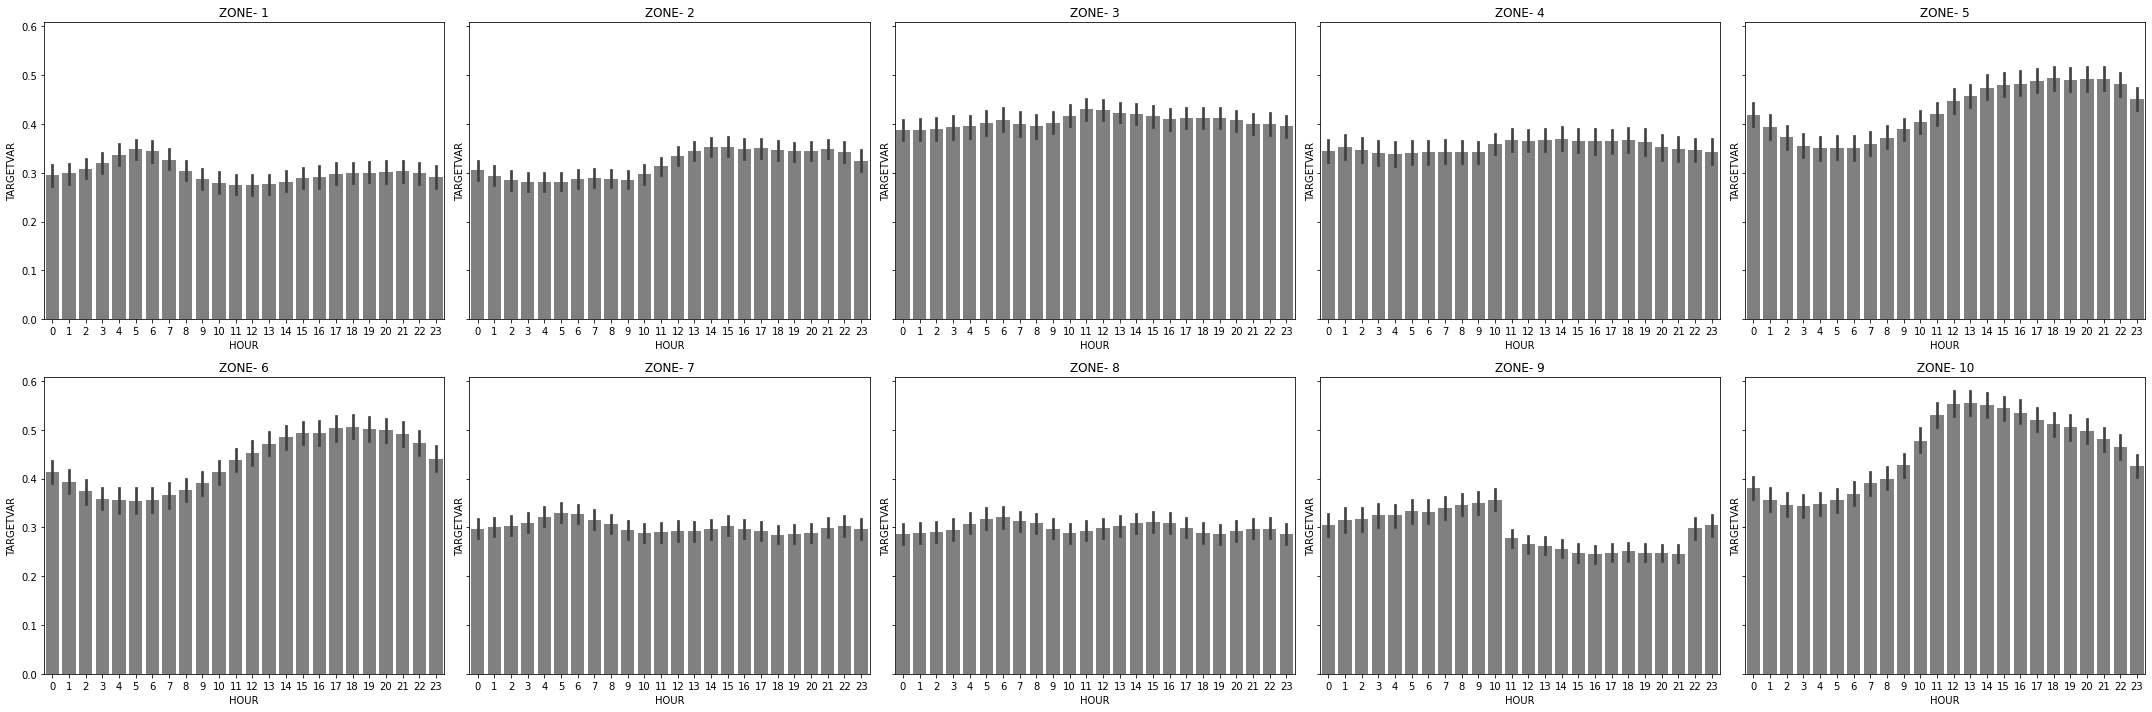

In [6]:
fig, ax = plt.subplots(2,5,figsize=(30,10),sharey=True)
ax = ax.ravel()
for zone in range(1,11):
    sns.barplot(data = df[df.ZONEID==zone], x = 'HOUR', y = 'TARGETVAR', color='gray', ax=ax[zone - 1])
    ax[zone - 1].set_title('ZONE- {}'.format(zone))
fig.tight_layout()


Target over month for every windfarm

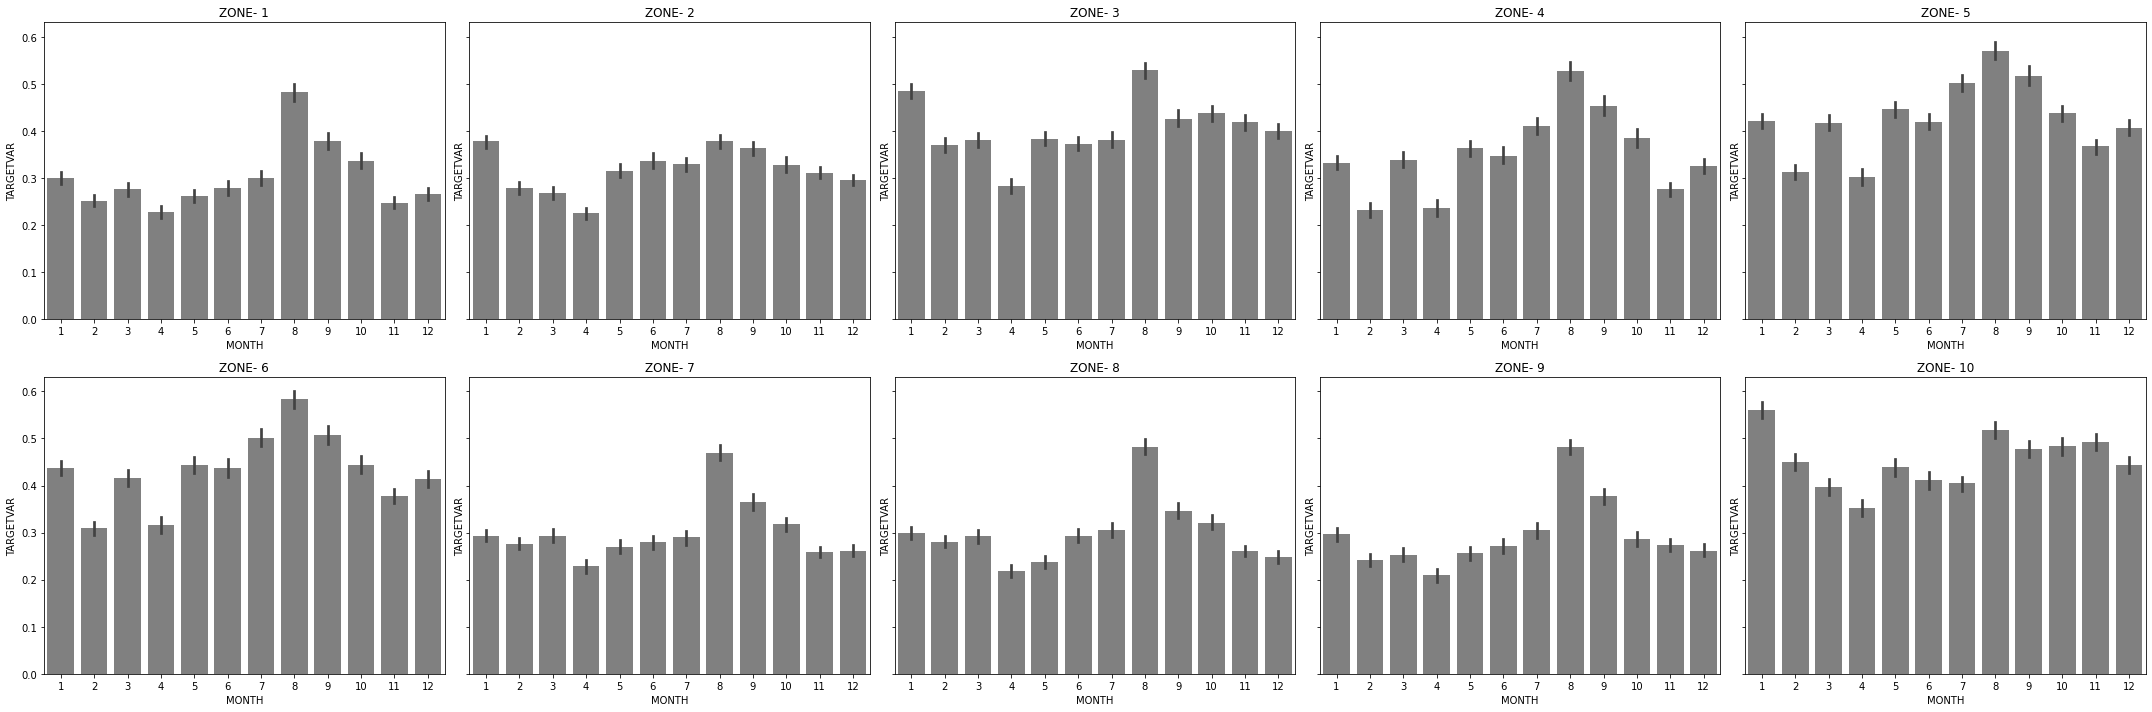

In [7]:
fig, ax = plt.subplots(2,5,figsize=(30,10),sharey=True)
ax = ax.ravel()
for zone in range(1,11):
    sns.barplot(data = df[df.ZONEID==zone], x = 'MONTH', y = 'TARGETVAR', color='gray', ax=ax[zone - 1])
    ax[zone - 1].set_title('ZONE- {}'.format(zone))
fig.tight_layout()

Energy output by winddirection

In [11]:
df['wd10_rd'] = (df.WD10 // 5) * 5
df.head()

,ZONEID,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,IS_HOLIDAY,...,WD10CARD_NW,WD10CARD_S,WD10CARD_SE,WD10CARD_SSE,WD10CARD_SSW,WD10CARD_SW,WD10CARD_W,WD10CARD_WNW,WD10CARD_WSW,wd10_rd
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2012-01-01 01:00:00,1,0.000000,2.124600,-2.681966,2.864280,-3.666076,1,1,6,1,...,1,0,0,0,0,0,0,0,0,320.0
2012-01-01 02:00:00,1,0.054879,2.521695,-1.796960,3.344859,-2.464761,2,1,6,1,...,1,0,0,0,0,0,0,0,0,305.0
2012-01-01 03:00:00,1,0.110234,2.672210,-0.822516,3.508448,-1.214093,3,1,6,1,...,0,0,0,0,0,0,0,1,0,285.0
2012-01-01 04:00:00,1,0.165116,2.457504,-0.143642,3.215233,-0.355546,4,1,6,1,...,0,0,0,0,0,0,1,0,0,270.0
2012-01-01 05:00:00,1,0.156940,2.245898,0.389576,2.957678,0.332701,5,1,6,1,...,0,0,0,0,0,0,1,0,0,260.0


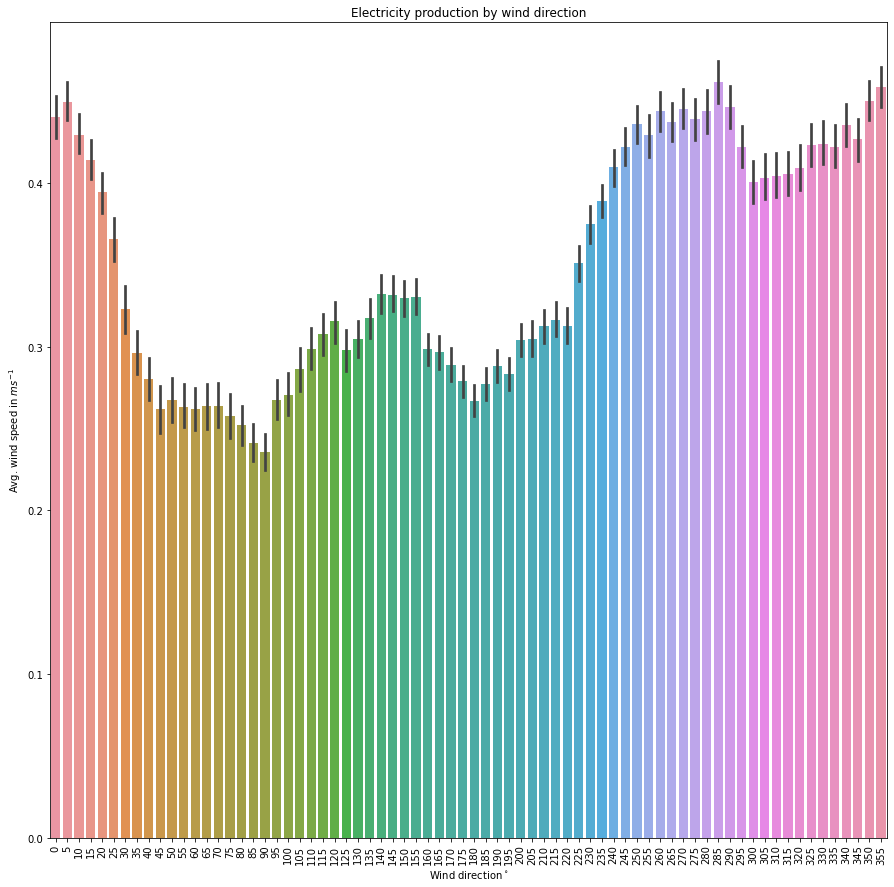

In [12]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.barplot(data = df, x = 'wd10_rd', y = 'TARGETVAR', ax = ax)
ax.set_xticklabels([int(x) for x in sorted(df.wd10_rd.unique())])
plt.xlabel('Wind direction' + r'$^\circ$')
plt.ylabel('Avg. wind speed in '+ r'$ms^{-1}$')
plt.xticks(rotation=90)
plt.title('Electricity production by wind direction')
plt.show()
